In [117]:
#Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
#Read file
users = pd.read_json('users.json', lines=True)

In [119]:
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


In [120]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _id           495 non-null    object
 1   active        495 non-null    bool  
 2   createdDate   495 non-null    object
 3   lastLogin     433 non-null    object
 4   role          495 non-null    object
 5   signUpSource  447 non-null    object
 6   state         439 non-null    object
dtypes: bool(1), object(6)
memory usage: 23.8+ KB


In [121]:
#Check missing value
na_table = users.isna().sum()
na_table/len(users)

_id             0.000000
active          0.000000
createdDate     0.000000
lastLogin       0.125253
role            0.000000
signUpSource    0.096970
state           0.113131
dtype: float64

In [122]:
#Deal woth data format/type issue
#id(dict -> string)
new_id = []
id_list = users['_id'].tolist()
for i in id_list:
    new_id.append(i['$oid'])
users['_id'] = new_id 
users['_id'] = users['_id'].astype('string')

In [123]:
#Date(object to datetime)
for col in ['createdDate','lastLogin']:
    datetemp=[]
    temp = users[col].tolist()
    for row in temp:
        if type(row) != float:
            datetemp.append(pd.to_datetime(row['$date']))
        else:
            datetemp.append('')
    users[col] = datetemp

In [124]:
#Duplicate Check, if duplicate then drop
print(users.duplicated().sum())
users.drop_duplicates(inplace=True)
print(users.duplicated().sum())

283
0


<AxesSubplot:xlabel='active', ylabel='count'>

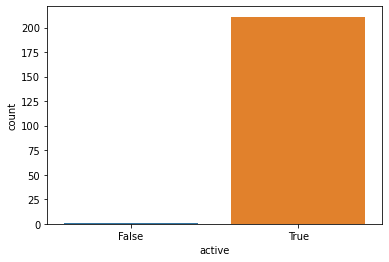

In [125]:
#Check imbalance
active_prop = pd.DataFrame(users.active.value_counts())
active_prop.reset_index(inplace=True)
active_prop.rename(columns={'index':'active', 'active':'count'},inplace=True)
sns.barplot(x='active', y='count',data=active_prop)

<AxesSubplot:xlabel='signUpSource', ylabel='count'>

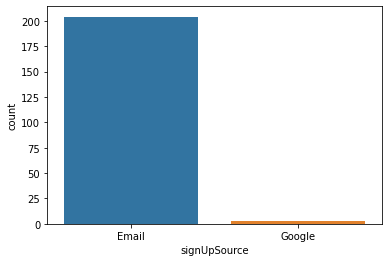

In [126]:
source_prop = pd.DataFrame(users.signUpSource.value_counts())
source_prop.reset_index(inplace=True)
source_prop.rename(columns={'index':'signUpSource', 'signUpSource':'count'},inplace=True)
sns.barplot(x='signUpSource', y='count',data=source_prop)

<AxesSubplot:xlabel='state', ylabel='count'>

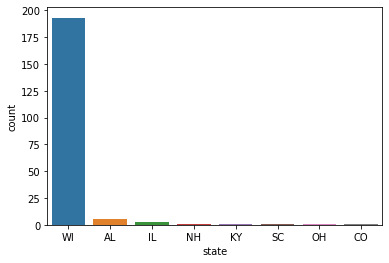

In [127]:
states_prop = pd.DataFrame(users.state.value_counts())
states_prop.reset_index(inplace=True)
states_prop.rename(columns={'index':'state', 'state':'count'},inplace=True)
sns.barplot(x='state', y='count', data = states_prop)

Data Quality Issues:
1. Wrong data type issue.
2. Some missing value in the dataset.
3. Duplicate data (283 rows, more than half of the dataset).
4. Aware of imbalance in 'active', 'signUpSource', and 'states' if we want to do more analysis or build models.